# Pymaceuticals Inc.
---

### Analysis

The purpose of this challenge was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
* Bar graph shows both Capomulin and Ramicane have the highest timepoints indicating that the mice in their experiments survived the most and thus     indicating a higher effectiveness of their medicines.
* Pie chart shows there are more number of male mice compared to female mice.
* Box plot show there is one outlier for Infubinol.
* Line graph for the mouse l509 for Capomulin drug shows a good reduction of the tumor volume over a period of time
* Scatter plot shows a positive corelation when comparing the weight and the avg tumor volume.
  
  


 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mousestudy_data = pd.merge(study_results,mouse_metadata,how ="left",on = "Mouse ID")

# Display the data table for preview
mousestudy_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Checking the number of mice.
mousestudy_data['Mouse ID'].nunique()

249

In [6]:
g989_data = study_results[study_results['Mouse ID'] == 'g989']
g989_indices = g989_data.index
g989_indices

Index([107, 137, 329, 360, 620, 681, 815, 869, 950, 1111, 1195, 1380, 1592], dtype='int64')

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice= mousestudy_data[mousestudy_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
filter_duplicate = mousestudy_data['Mouse ID'] == 'g989'
mousestudy_data.loc[filter_duplicate]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter_mousedata = mousestudy_data['Mouse ID']!='g989'
clean_mousedata = mousestudy_data.loc[filter_mousedata]
clean_mousedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mousedata['Mouse ID'].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
n = clean_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()

sem =std/np.sqrt(n)
summary_mousedata = pd.DataFrame({
                            
                        'Mean Tumor Volume': mean,
                        'Median Tumor Volume':median,
                        'Tumor Volume Variance':var ,
                       'Tumor Volume Std. Dev.':std,
                        'Tumor Volume Std. Err.': sem ,                        


    
})
summary_mousedata

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_mousedata.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
drugs = clean_mousedata['Drug Regimen'].unique()
drugs

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

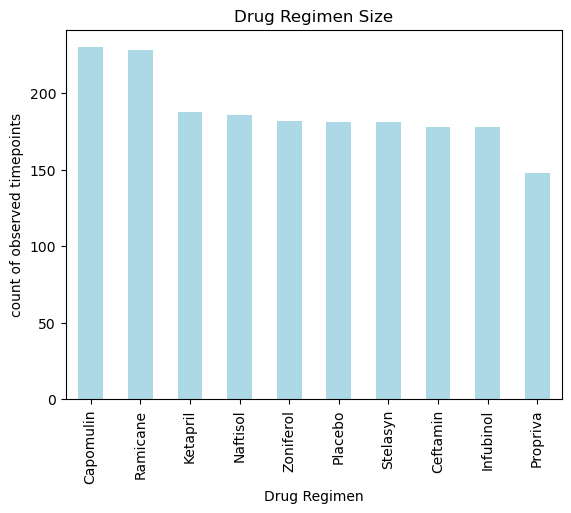

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mousedata.groupby('Drug Regimen').size().sort_values(ascending=False).plot(kind='bar',title='Drug Regimen Size',
       ylabel='count of observed timepoints',color = 'lightblue')
plt.xticks(rotation=90)
plt.show() 

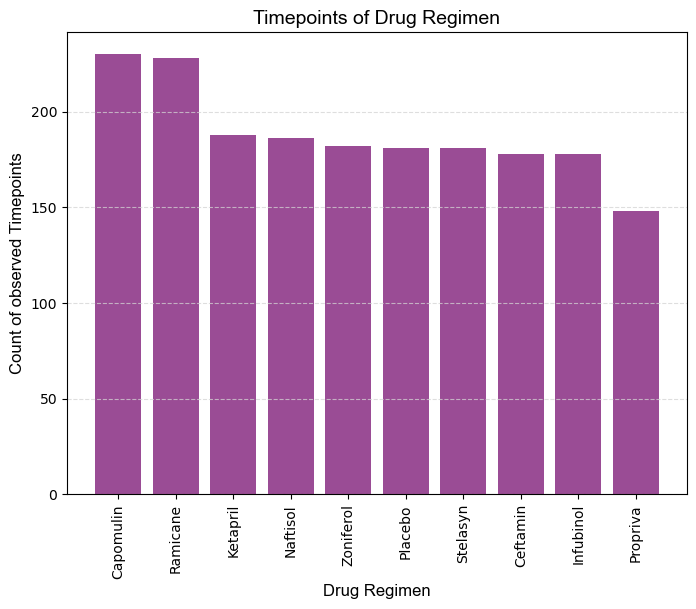

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Data Viz Recipe
data = clean_mousedata.groupby('Drug Regimen').size().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(8, 6))

# Create a basic plot
plt.bar(data.index, data.values, color="#9A4C95", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Count of observed Timepoints", fontfamily="Arial", fontsize=12)
plt.title("Timepoints of Drug Regimen", fontsize=14, fontfamily="Arial")

plt.xticks(rotation=90)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()


In [17]:
clean_mousedata['Mouse ID'].nunique()

248

In [18]:
unique_sex_count=clean_mousedata.groupby('Sex')['Mouse ID'].nunique()

In [19]:
female_ratio=round((123/248)*100,1)
female_ratio

49.6

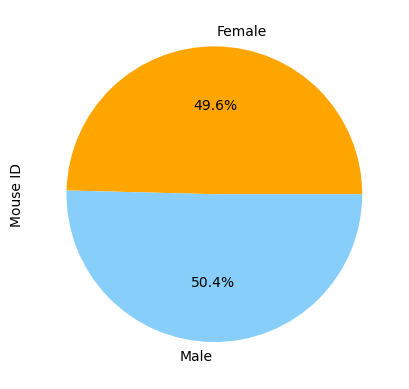

In [20]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
total_count=clean_mousedata['Mouse ID'].nunique()
unique_sex_count=clean_mousedata.groupby('Sex')['Mouse ID'].nunique()
sex_ratio=(unique_sex_count/total_count)*100

# Make the pie chart
sex_ratio.plot(kind='pie', labels=sex_ratio.index, autopct='%1.1f%%', colors=["orange", "lightskyblue"])
plt.show()


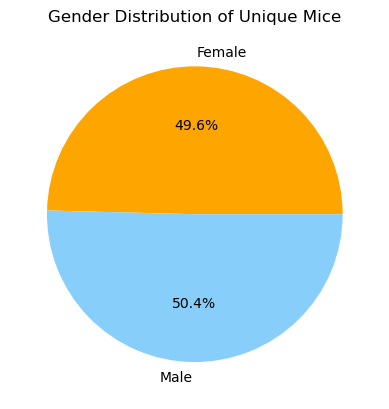

In [21]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
total_count=clean_mousedata['Mouse ID'].nunique()
unique_sex_count=clean_mousedata.groupby('Sex')['Mouse ID'].nunique()
sex_ratio=(unique_sex_count/total_count)*100

# Make the pie chart
# Labels for the sections of our pie chart
labels = ["Female", "Male"]


# The colors of each section of the pie chart
colors = [ "orange", "lightskyblue"]

plt.title('Gender Distribution of Unique Mice')
plt.pie(sex_ratio, labels=labels, colors=colors,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
last_timepoint=drug_regimen_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filter_bydrug = (clean_mousedata['Drug Regimen'] == 'Capomulin') | (clean_mousedata['Drug Regimen'] == 'Ramicane') | \
(clean_mousedata['Drug Regimen'] == 'Infubinol') |(clean_mousedata['Drug Regimen'] == 'Ceftamin')
# Start by getting the last (greatest) timepoint for each mouse
drug_regimen_df=clean_mousedata.loc[filter_bydrug]
last_timepoint=drug_regimen_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drugregimen_timepoint = pd.merge(last_timepoint,drug_regimen_df, on=['Mouse ID', 'Timepoint'], how='left')
drugregimen_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]


 # Locate the rows which contain mice on each drug and get the tumor volumes  #used help from chatgpt 
for drug in treatment_list:
   treatment_df = drugregimen_timepoint[drugregimen_timepoint['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    # add subset
   tumor_vol_data.append(treatment_df)
   # Calculate the IQR and quantitatively determine if there are any potential outliers.
   Q1 = treatment_df.quantile(0.25)
   Q3 = treatment_df.quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - (1.5 * IQR)
   upper_bound = Q3 + (1.5 * IQR) 
    # Determine outliers using upper and lower bounds
   outliers = treatment_df[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
   
  
   print(f"{drug}'s potential outliers: {outliers.tolist()}")     #used help from chatgpt to print this output 


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


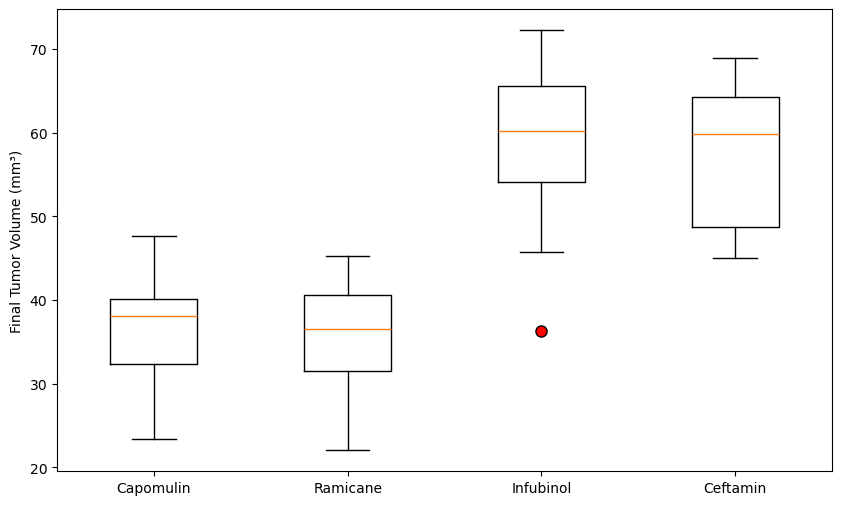

In [26]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(tumor_vol_data, tick_labels=treatment_list,flierprops=dict(marker='o', color='black', markerfacecolor='red',markersize=8) )                                 

# Add labels

plt.ylabel('Final Tumor Volume (mm³)')

# Display the plot
plt.show()


## Line and Scatter Plots

In [27]:
mask_capmulin=(clean_mousedata['Drug Regimen'] == 'Capomulin') & (clean_mousedata['Mouse ID']=='l509')
new_df= clean_mousedata.loc[mask_capmulin]
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


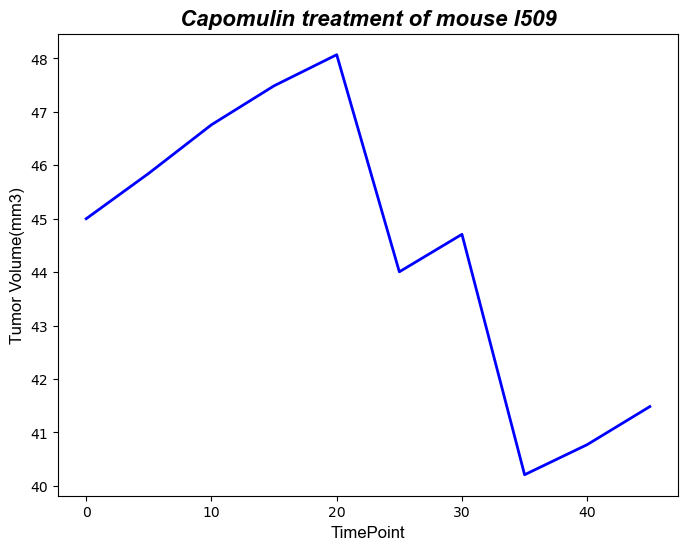

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(8, 6))

# Create a basic plot
plt.plot(new_df['Timepoint'], new_df['Tumor Volume (mm3)'],  color="blue", linewidth=2)


# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("TimePoint", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume(mm3)", fontfamily="Arial", fontsize=12)
plt.title("Capomulin treatment of mouse l509", fontweight="bold", fontsize=16, fontfamily="Arial", fontstyle="italic")


# Show/Save the Graph
plt.show()

Text(0, 0.5, ' Avg Tumor Volume (mm³)')

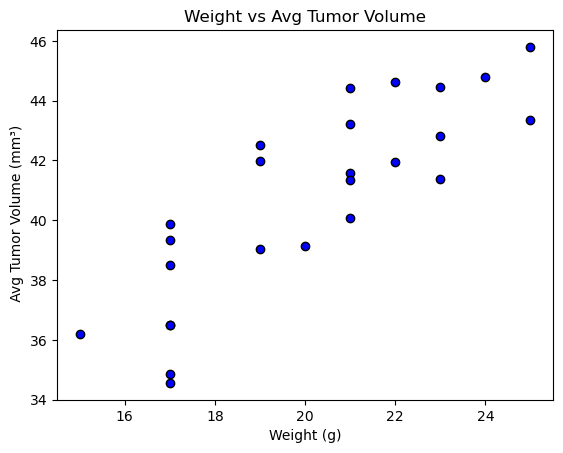

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"

filter_capomulin = clean_mousedata.loc[clean_mousedata["Drug Regimen"] == regimen]
df_mean_vol = filter_capomulin.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()
df6.head()
plt.scatter(x=df_mean_vol['Weight (g)'],y=df_mean_vol['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")

plt.title('Weight vs Avg Tumor Volume')           
plt.xlabel("Weight (g)")
plt.ylabel(" Avg Tumor Volume (mm³)")


## Correlation and Regression

The correlation between both factors is 0.84
y = 0.95x + 21.55


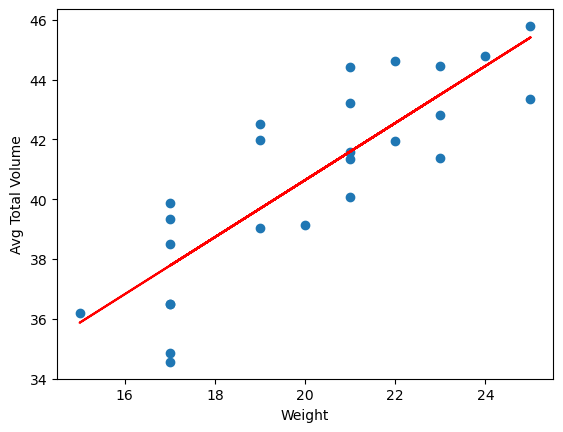

In [36]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Weight = df_mean_vol['Weight (g)'] 
Avg_vol = df_mean_vol['Tumor Volume (mm3)'] 
correlation = st.pearsonr(Weight,Avg_vol)
plt.scatter(Weight,Avg_vol)
plt.xlabel('Weight')
plt.ylabel('Avg Total Volume')
print(f"The correlation between both factors is {correlation[0]:.2f}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight,Avg_vol)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(Weight,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.show()